https://www.councilofelrond.com/subject/the-fellowship-of-the-ring-2/
<function <lambda> at 0x0000023507ECFC18>
{0: [('frodo', 386), ('gandalf', 273), ('ring', 150), ('aragorn', 144), ('sam', 138), ('boromir', 116), ('bilbo', 104), ('pippin', 101), ('merry', 100), ('legolas', 65), ('gimli', 56), ('looks', 54), ('hobbits', 53), ('saruman', 52), ('strider', 47), ('turns', 46), ('fellowship', 45), ('come', 39), ('arwen', 38), ('sauron', 37), ('walks', 35), ('away', 34), ('elrond', 34), ('sword', 34), ('know', 34), ('hand', 33), ('runs', 33), ('look', 33), ('suddenly', 30), ('sees', 29)]}
0
frodo, gandalf, ring, aragorn, sam, boromir, bilbo, pippin, merry, legolas, gimli, looks, hobbits, saruman


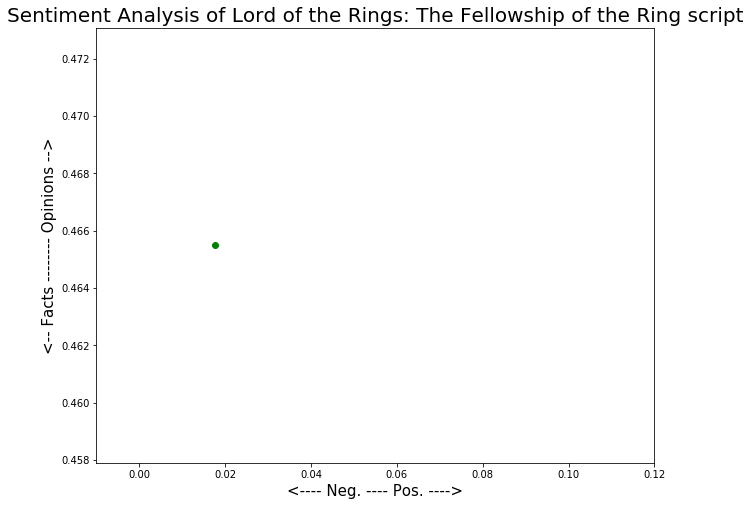

[(0,
  '0.000*"frodo" + 0.000*"gandalf" + 0.000*"sam" + 0.000*"aragorn" + 0.000*"ring" + 0.000*"bilbo" + 0.000*"merry" + 0.000*"boromir" + 0.000*"pippin" + 0.000*"notpass"'),
 (1,
  '0.038*"frodo" + 0.027*"gandalf" + 0.015*"ring" + 0.014*"aragorn" + 0.014*"sam" + 0.011*"boromir" + 0.010*"bilbo" + 0.010*"pippin" + 0.010*"merry" + 0.006*"legolas"'),
 (2,
  '0.000*"frodo" + 0.000*"gandalf" + 0.000*"boromir" + 0.000*"sam" + 0.000*"aragorn" + 0.000*"bilbo" + 0.000*"ring" + 0.000*"merry" + 0.000*"pippin" + 0.000*"legolas"')]

In [6]:
# To do the topic modeling, I will bring back in my document term matrix using the pandas and pickle
import pandas as pd
data = pd.read_pickle('lotr_doc_term.pkl')
data

# I will be doing a topic modeling known as LDA and importing the necessary modules to do so.
# matutils is used to create a corpus from a document term matrix, models is used for the analysis, and scipy.sparse is used to
# turn our document term matrix into a sparse matrix
from gensim import matutils, models
import scipy.sparse

# One of the required inputs for LDA in genism is a term-document matrix
lotr_term_doc_matrix = data.transpose()
lotr_term_doc_matrix.head()

# Here we turn our script in the term-document matrix into a gensim format
sparse_matrix = scipy.sparse.csr_matrix(lotr_term_doc_matrix)
lotr_corpus_genism = matutils.Sparse2Corpus(sparse_matrix)

# Now we read back in our document called 'count_vect' that we created before to create a dictionary of all the terms and 
# their locations in the tdm.
count_vect = pickle.load(open('count_vect.plk', 'rb'))
word_location = dict((x, y) for y, x in count_vect.vocabulary_.items())

# Having both the location and corpus allows us to run our topic modeling!

# Now that we have the corpus and word_location,we can specify two other parameters as well - 
# the number of topics and the number of passes.
lda_model = models.LdaModel(corpus=lotr_corpus_genism, id2word=word_location, num_topics=3, passes=80)
lda_model.print_topics()